In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
sb.set_palette('dark')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
test_data = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')

In [3]:
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
test_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [5]:
id=test_data.id

# **Looking For Null Values**

In [6]:
print('Training Data:\n')
print(train_data.isnull().sum())
print('')


Training Data:

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64



In [7]:
print('test data:\n')
print(test_data.isnull().sum())

test data:

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


**No NaN Values**

In [8]:
train_data['Region_Code'].unique()


array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

# **Data PreProcessing**

In [9]:
train_data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
lb = LabelBinarizer()
le = LabelEncoder()
train_data['Gender'] = lb.fit_transform(train_data['Gender'])
test_data['Gender'] = lb.fit_transform(test_data['Gender'])
train_data['Vehicle_Damage'] = lb.fit_transform(train_data['Vehicle_Damage'])
test_data['Vehicle_Damage'] = lb.fit_transform(test_data['Vehicle_Damage'])



In [11]:
train_data.drop(['id'],1,inplace=True)

In [12]:
test_data.drop(['id','Vehicle_Age'],1,inplace=True)

In [13]:
test_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,1,33762.0,7.0,111
2,1,47,1,28.0,0,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...
127032,0,26,1,37.0,1,0,30867.0,152.0,56
127033,0,38,1,28.0,0,1,28700.0,122.0,165
127034,1,21,1,46.0,1,0,29802.0,152.0,74
127035,1,71,1,28.0,1,0,62875.0,26.0,265


# **Exploratory Data Analysis**

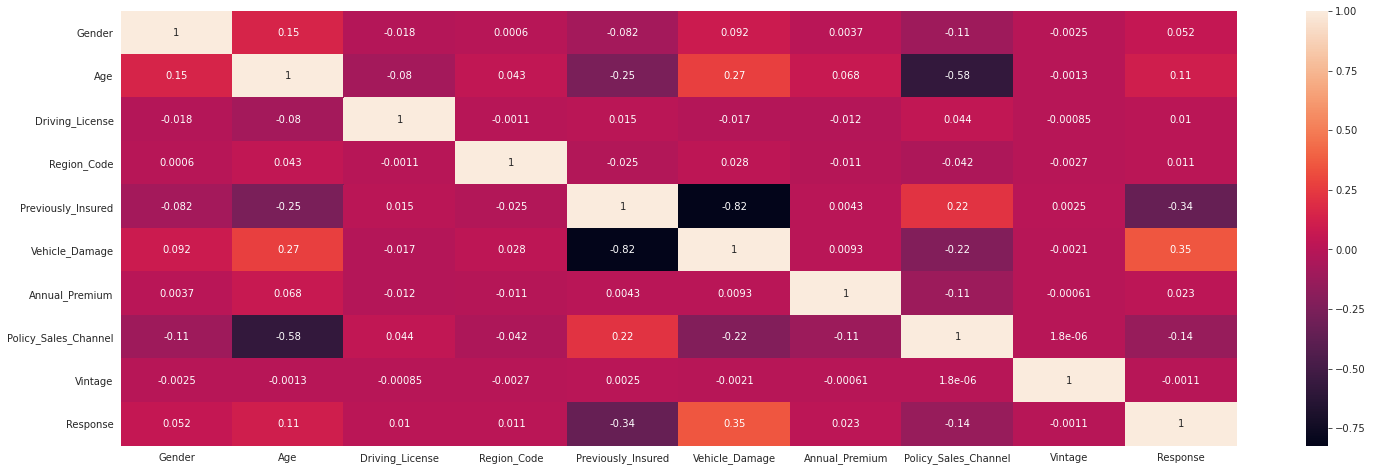

In [14]:
plt.figure(figsize = (25,8))
sb.heatmap(train_data.corr(),annot=True)

* Age and Previously Damaged have a positive corelation with with type of response
* Previously insured and Policy Sales Channel have a negetive corelation with type of response


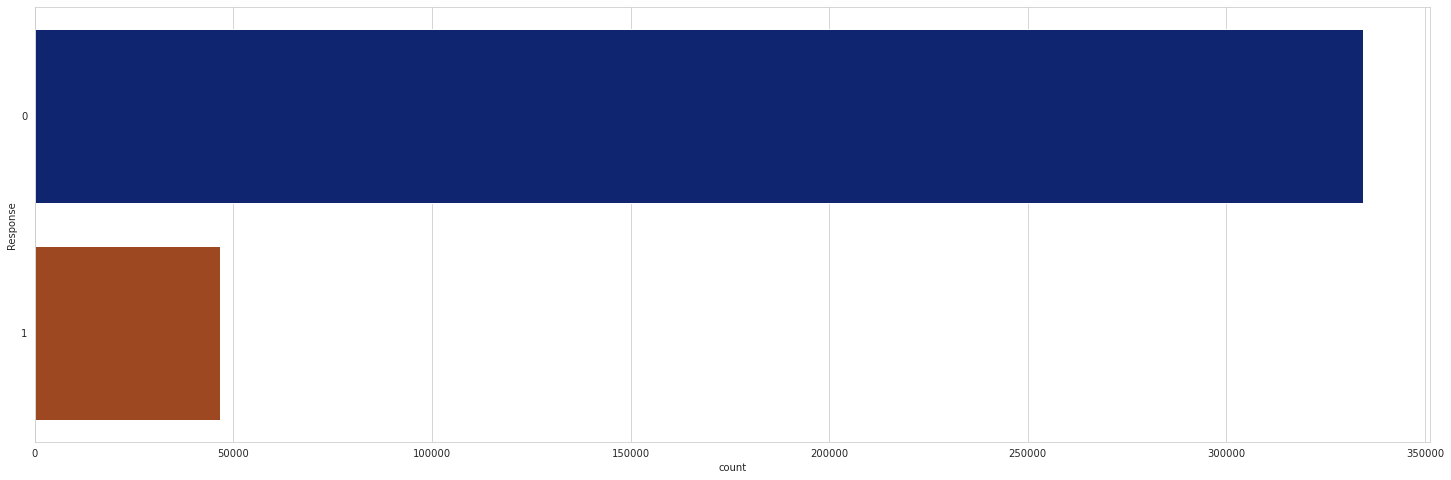

In [15]:
plt.figure(figsize = (25,8))
sb.countplot(y = train_data['Response'])

* Approx 325000 people's response was 0
* approx 49000 people's response was 1

**Gender Distribution**

Text(0.5, 1.0, 'Age Distribution')

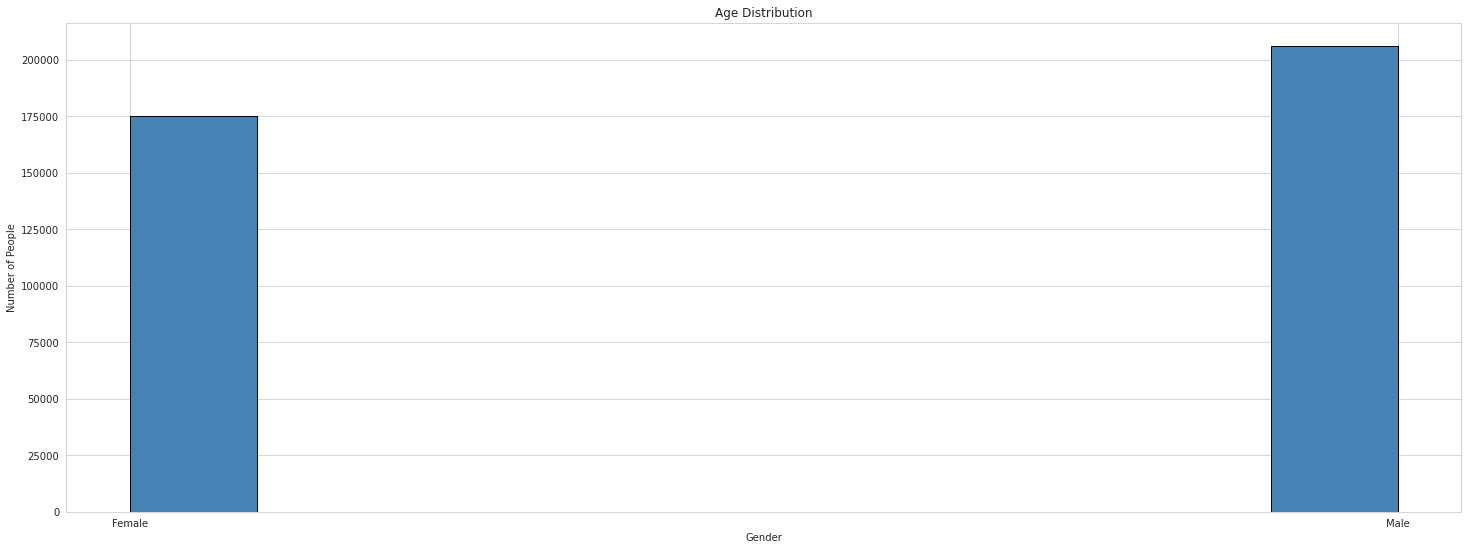

In [16]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Gender'],color='steelblue',edgecolor='black')
plt.xticks([0,1],labels = ['Female','Male'])
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Age Distribution')

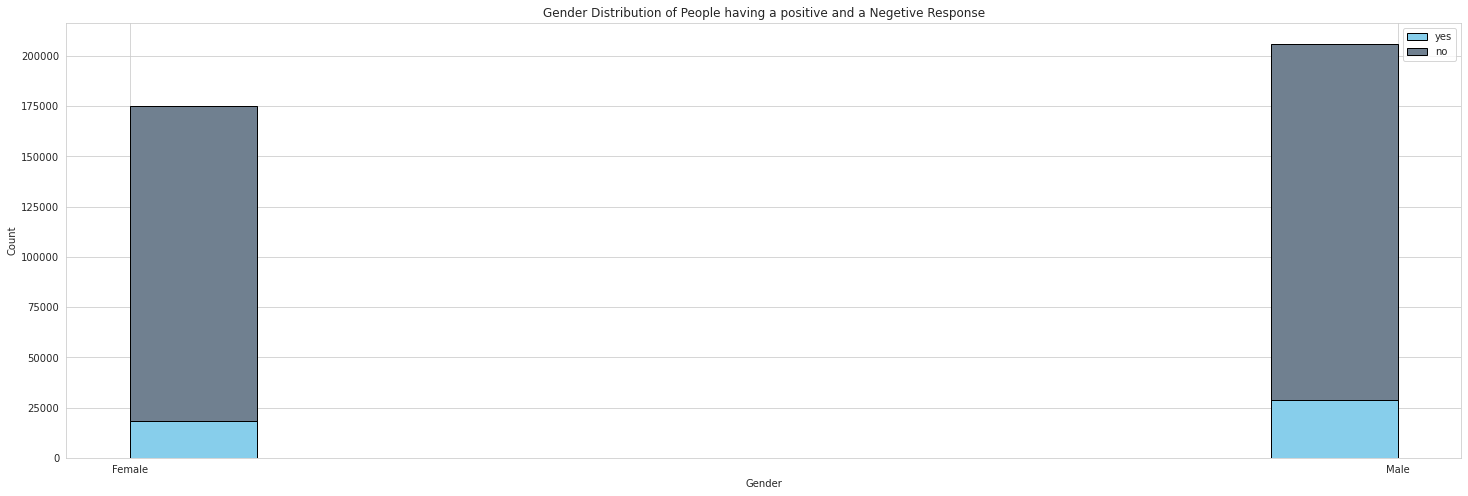

In [17]:
plt.figure(figsize = (25,8))
plt.hist(x = [train_data[train_data['Response']==1]['Gender'],train_data[train_data['Response']==0]['Gender']],color=['skyblue','slategrey'],stacked=True,edgecolor='black',label = ['yes','no'])
plt.xticks(ticks = [0,1],labels = ['Female','Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of People having a positive and a Negetive Response')
plt.legend()

* 13% Females had a response 1
* 12% Males had a response 1

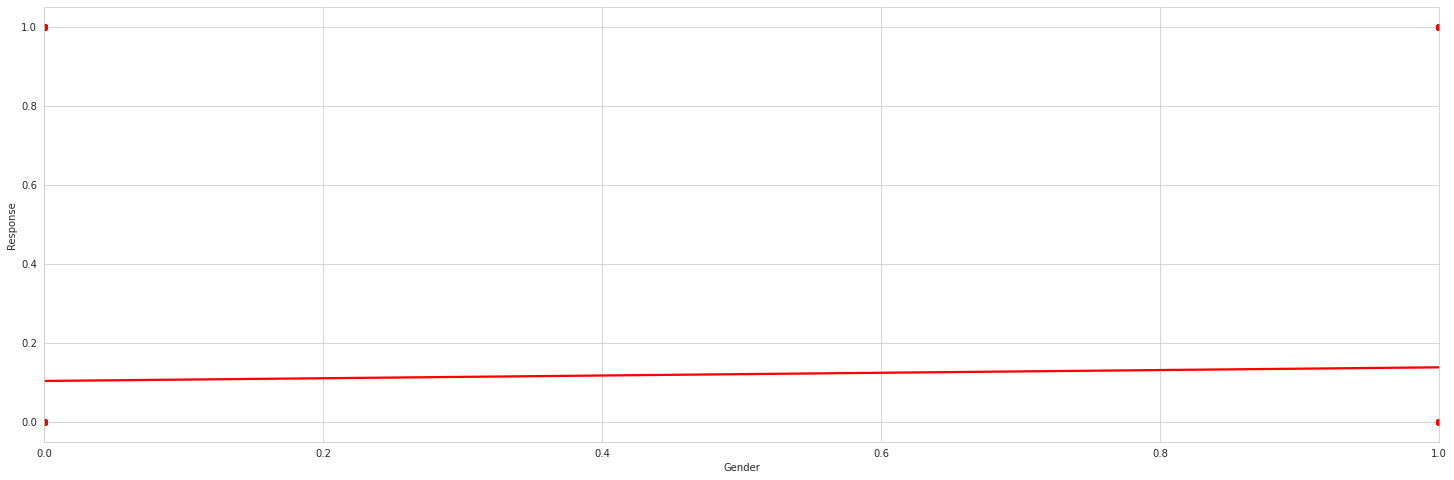

In [18]:
plt.figure(figsize = (25,8))
sb.regplot(train_data['Gender'],train_data['Response'],color='red')

The Regression Plot shows that the regression line is slightly titled that is because the count of male's is significantly higher than that of females thus **having a positive response is not gender dependent**

**Age Distribution of people and distribution of people of age whether they say yes or no!**

Text(0.5, 1.0, 'Age Distribution')

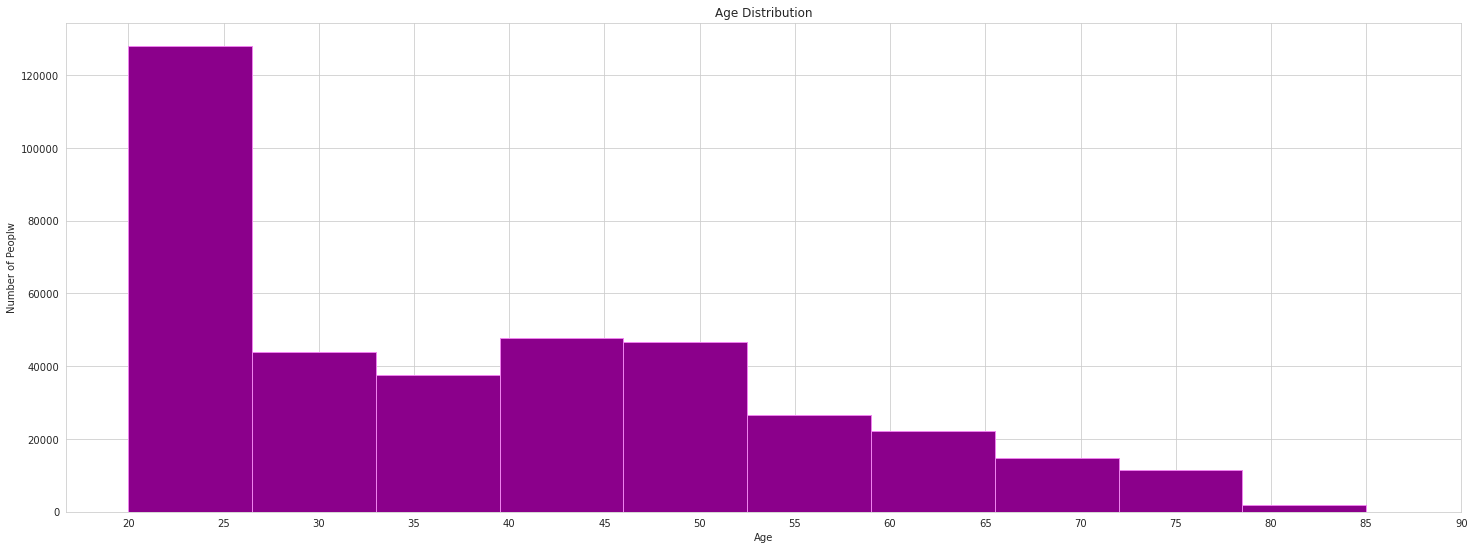

In [19]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Age'],color='darkmagenta',edgecolor='violet')
plt.xticks([20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.xlabel('Age')
plt.ylabel('Number of Peoplw')
plt.title('Age Distribution')

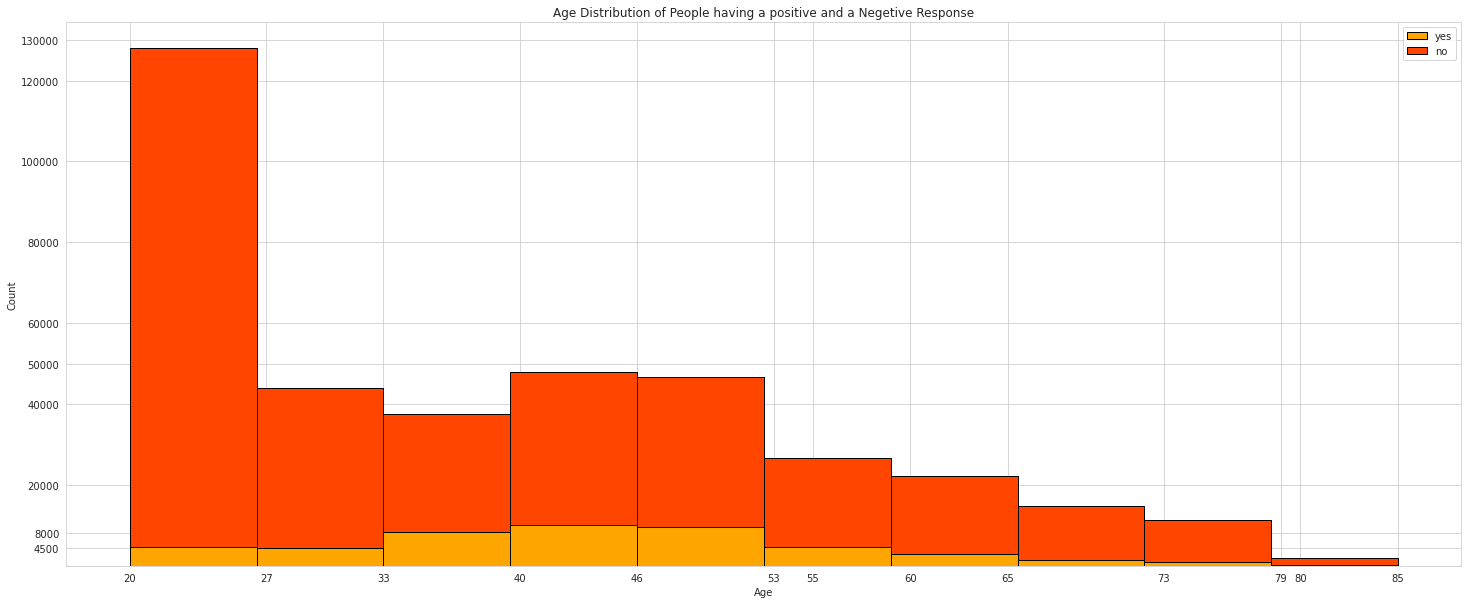

In [20]:
plt.figure(figsize = (25,10))
plt.hist(x = [train_data[train_data['Response']==1]['Age'],train_data[train_data['Response']==0]['Age']],color=['orange','orangered'],stacked=True,edgecolor='black',label = ['yes','no'])
plt.xticks([20,27,33,40,46,53,55,60,65,73,79,80,85])
plt.yticks([4500,8000,20000,40000,50000,60000,80000,100000,120000,130000])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of People having a positive and a Negetive Response')
plt.legend()

* 3% people between age 20 and 27 had a response 1
* 8% people between age 27 and 33 had a response 1
* 26% people between age 33 and 40 had a response 1
* 25% people between age 40 and 46 had a response 1
* 24% people between age 46 and 53 had a response 1
* 18% people between age 53 and 60 had a response 1
* 20% people between age 60 and 65 had a response 1
* 15% people between age 65 and 73 had a repsonse 1
* 5% people between age 73 and 79 had a  repsonse 1
* 1% people between age 79 and 85 had a repsonse  1




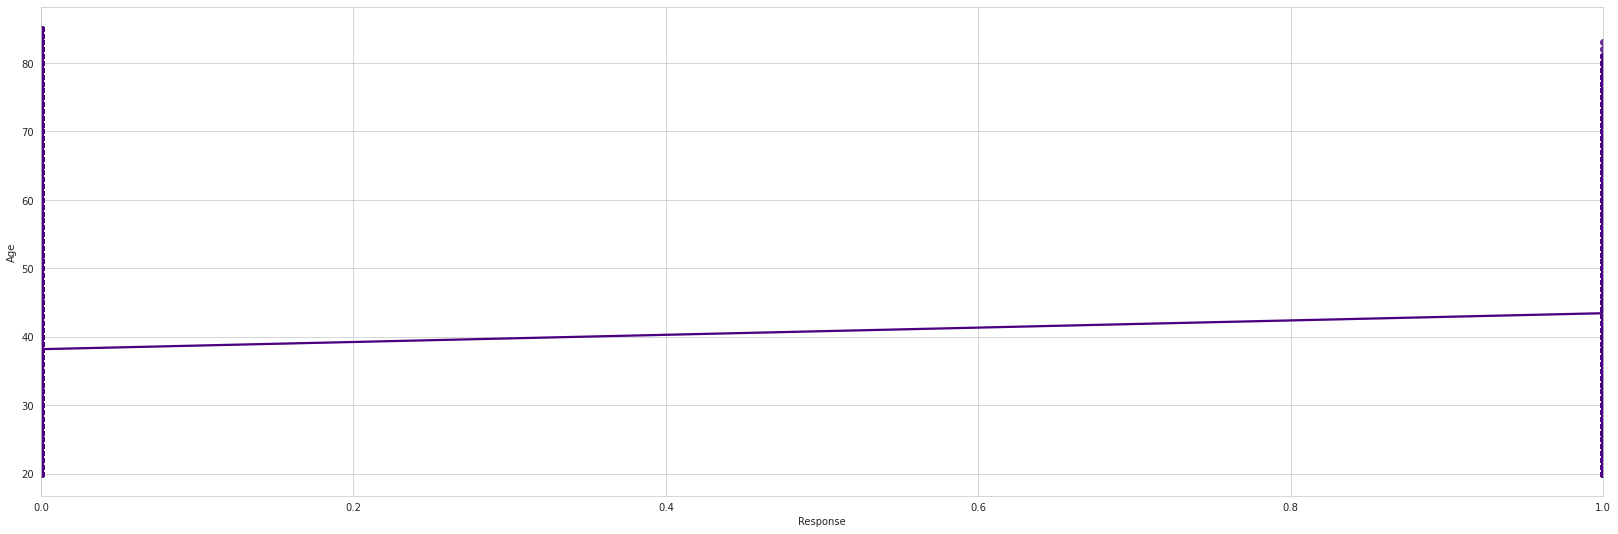

In [21]:
plt.figure(figsize = (28,9))
sb.regplot(train_data['Response'],train_data['Age'],color= 'indigo')

**Age has a average corelation co-efficient with response and response tends to increase with age**

**Does a person holding a driving license have a positive response?**

Text(0.5, 1.0, 'Driving License Distribution')

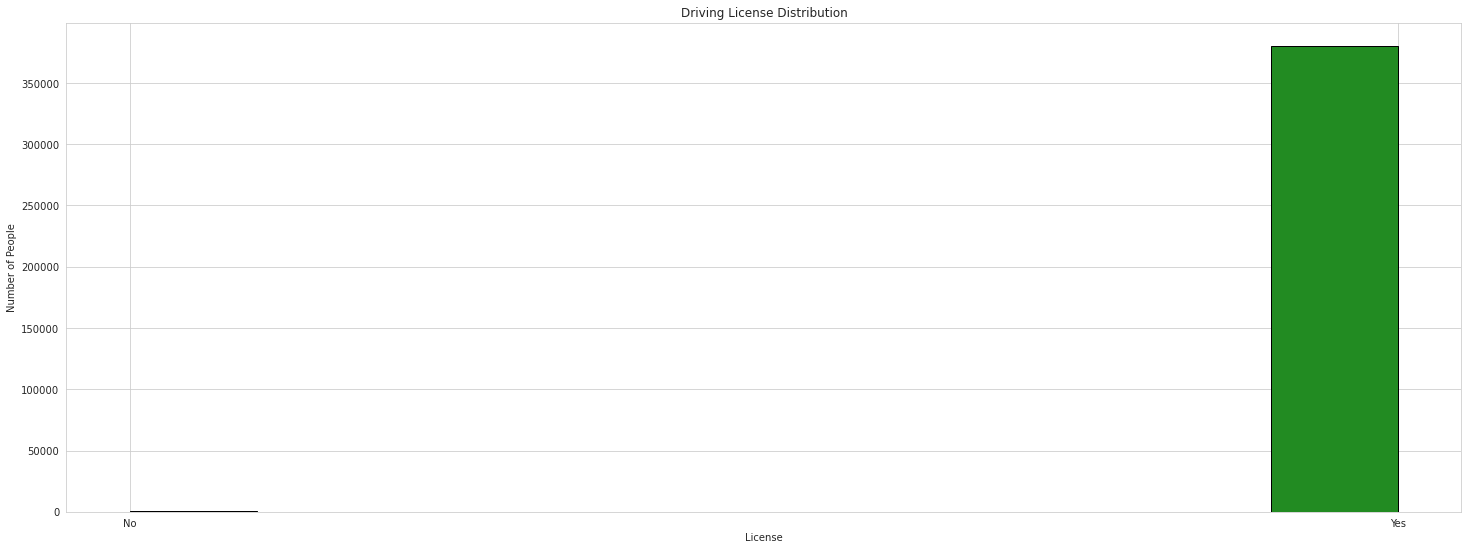

In [22]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Driving_License'],color='forestgreen',edgecolor='black')
plt.xticks([0,1],labels = ['No','Yes'])
plt.xlabel('License')
plt.ylabel('Number of People')
plt.title('Driving License Distribution')

almost 99% people hold a driving license

Text(0.5, 1.0, 'License Distribution of People having a positive and a Negetive Response')

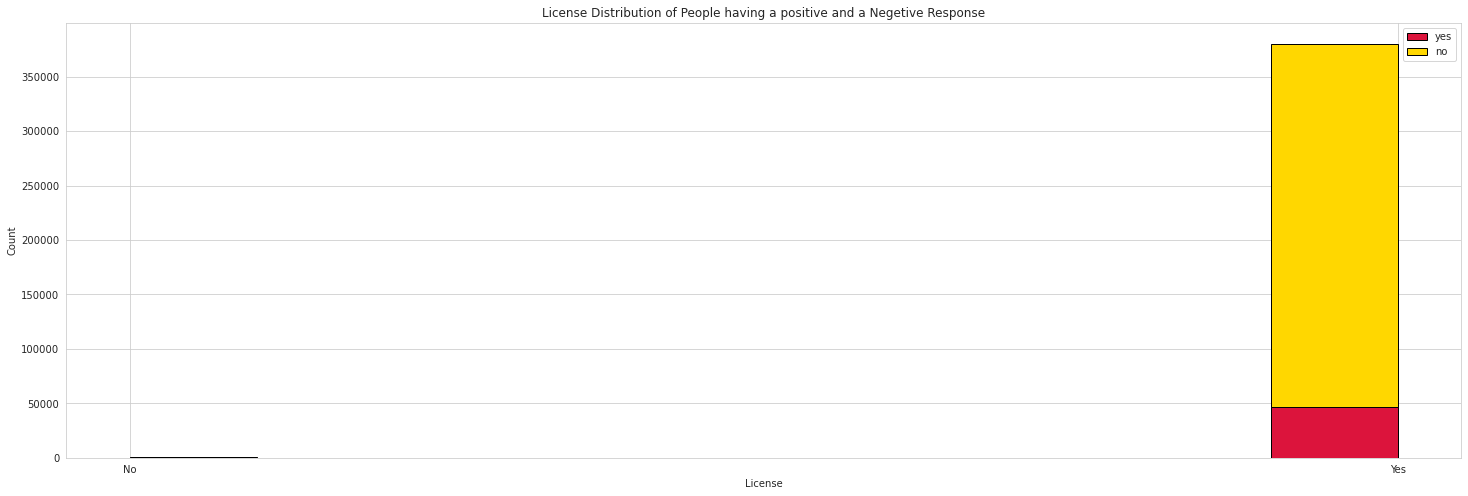

In [23]:
plt.figure(figsize = (25,8))
plt.hist(x = [train_data[train_data['Response']==1]['Driving_License'],train_data[train_data['Response']==0]['Driving_License']],color=['crimson','gold'],stacked=True,edgecolor='black',label = ['yes','no'])
plt.xticks(ticks = [0,1],labels = ['No','Yes'])
plt.xlabel('License')
plt.ylabel('Count')
plt.legend()
plt.title('License Distribution of People having a positive and a Negetive Response')

**only 1.3% people that hold a license had a response 1 thus it can be said that holding a license doesnt affect a persons response to insurance**

**Does having been previously insured have an effect on response?**

Text(0.5, 1.0, 'Previously Insurance Distribution')

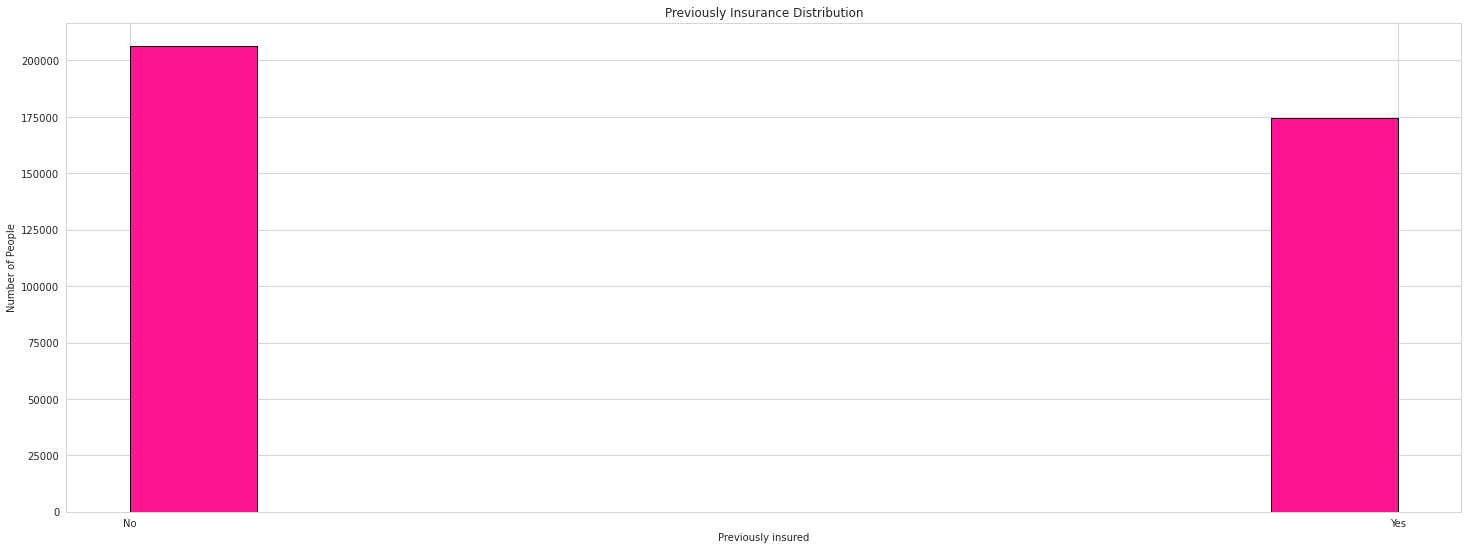

In [24]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Previously_Insured'],color='deeppink',edgecolor='black')
plt.xticks([0,1],labels = ['No','Yes'])
plt.xlabel('Previously insured')
plt.ylabel('Number of People')
plt.title('Previously Insurance Distribution')

* 45% people have been previously insured
* 55% people have not been insured previously insured 

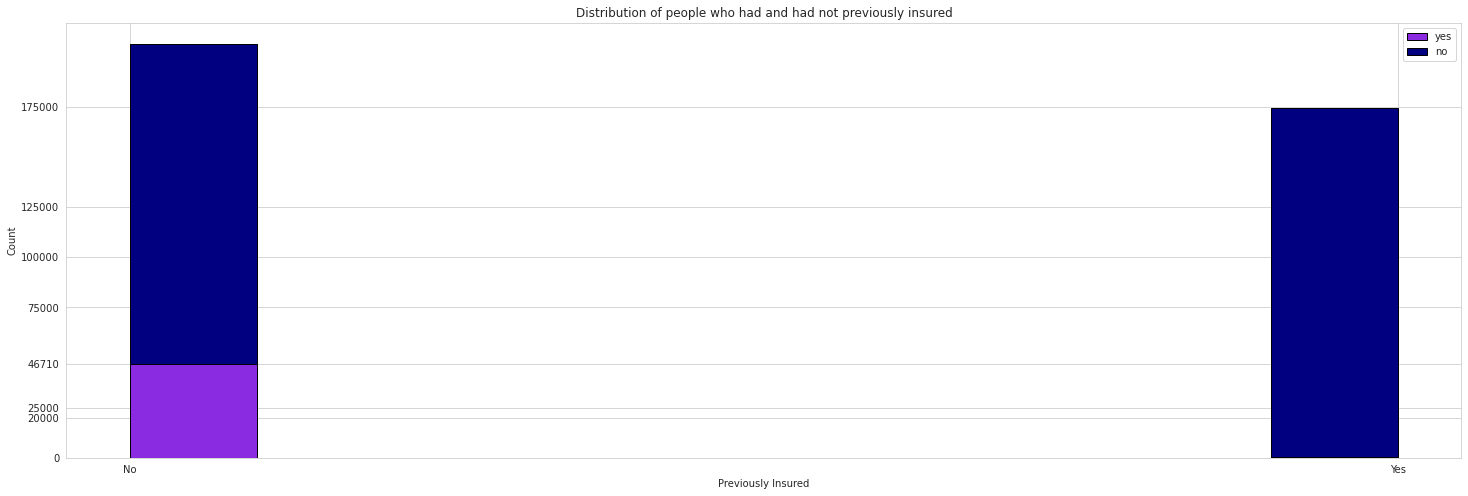

In [25]:
plt.figure(figsize = (25,8))
plt.hist(x = [train_data[train_data['Response']==1]['Previously_Insured'],train_data[train_data['Response']==0]['Previously_Insured']],color=['blueviolet','navy'],stacked=True,edgecolor='black',label = ['yes','no'])
plt.xticks(ticks = [0,1],labels = ['No','Yes'])
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.yticks([0,25000,46710,75000,100000,125000,175000,20000])
plt.title('Distribution of people who had and had not previously insured')
plt.legend()

* All the people who have responded 1 are those who have not been previously insured

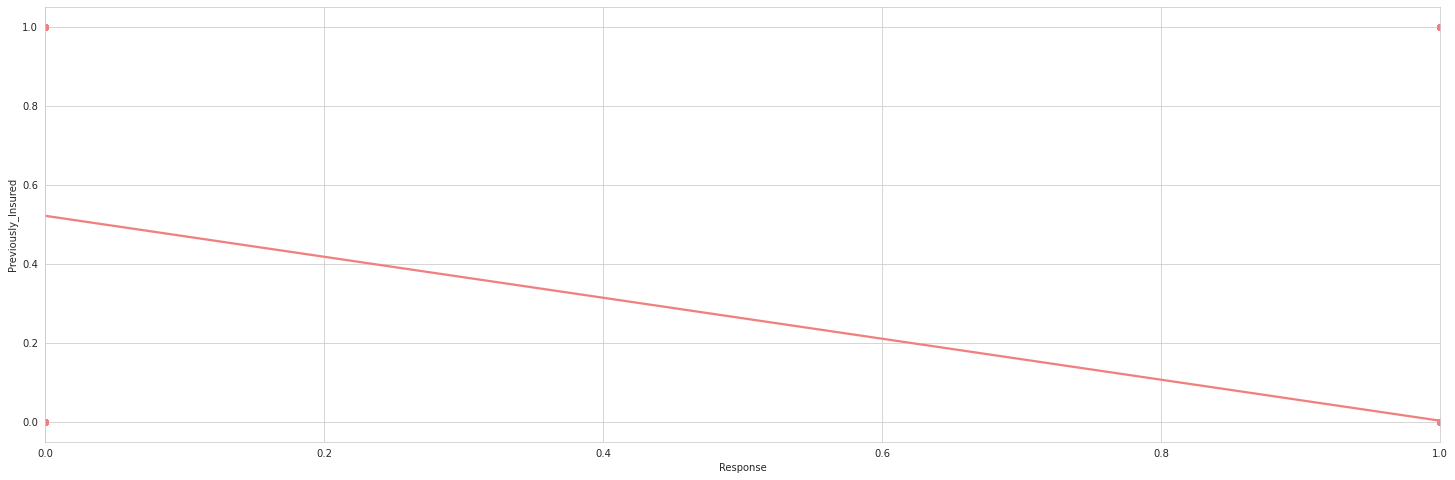

In [26]:
plt.figure(figsize = (25,8))
sb.regplot(train_data['Response'],train_data['Previously_Insured'],color = 'lightcoral')

**This shows that the people who have been previously insured have had a 0 response where as the people who had response 1 were those who were not previously insured**

**Do the people with Vehicle damage tend to have a positive response?**

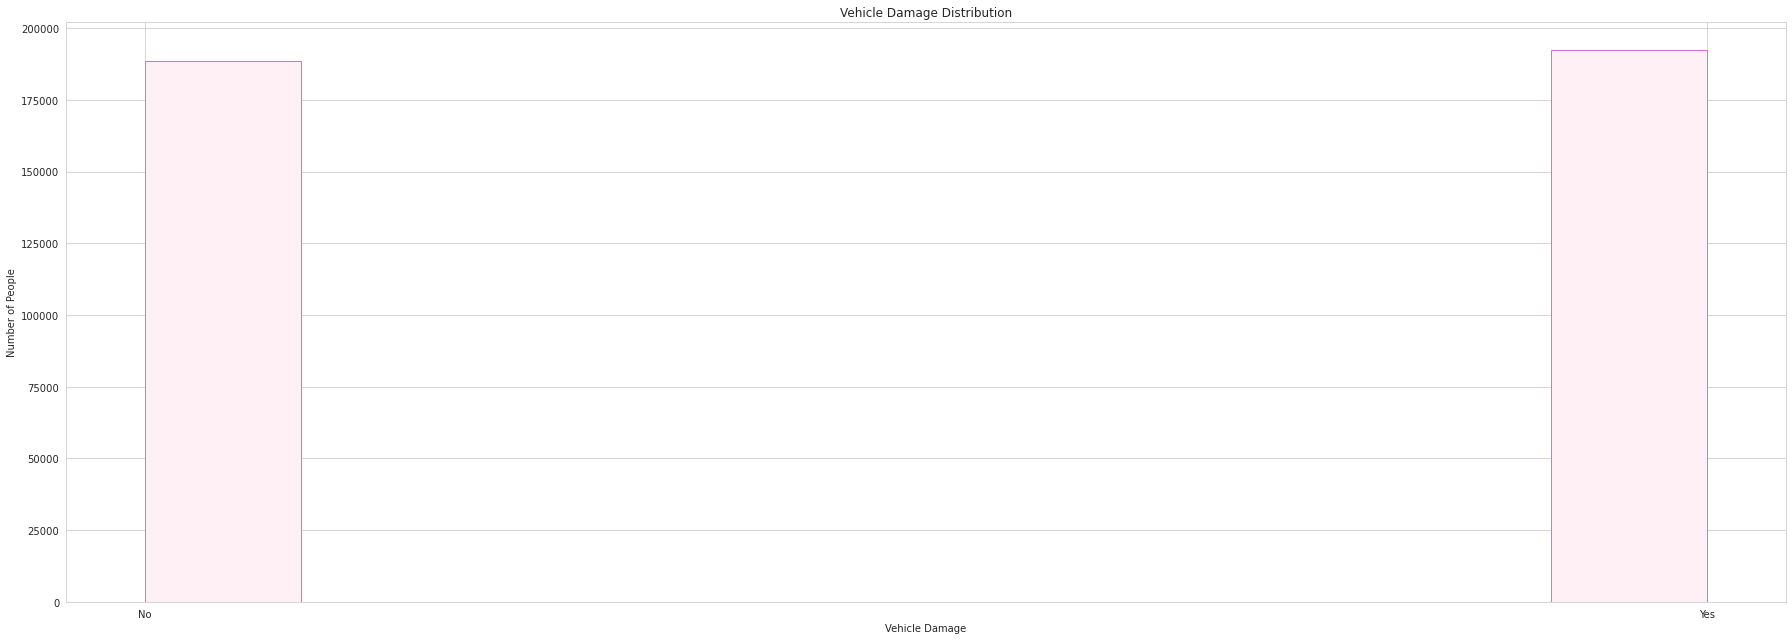

In [27]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Vehicle_Damage'],color='lavenderblush',edgecolor='orchid')
plt.xticks([0,1],labels = ['No','Yes'])
plt.xlabel('Vehicle Damage')
plt.ylabel('Number of People')
plt.title('Vehicle Damage Distribution')
plt.tight_layout()

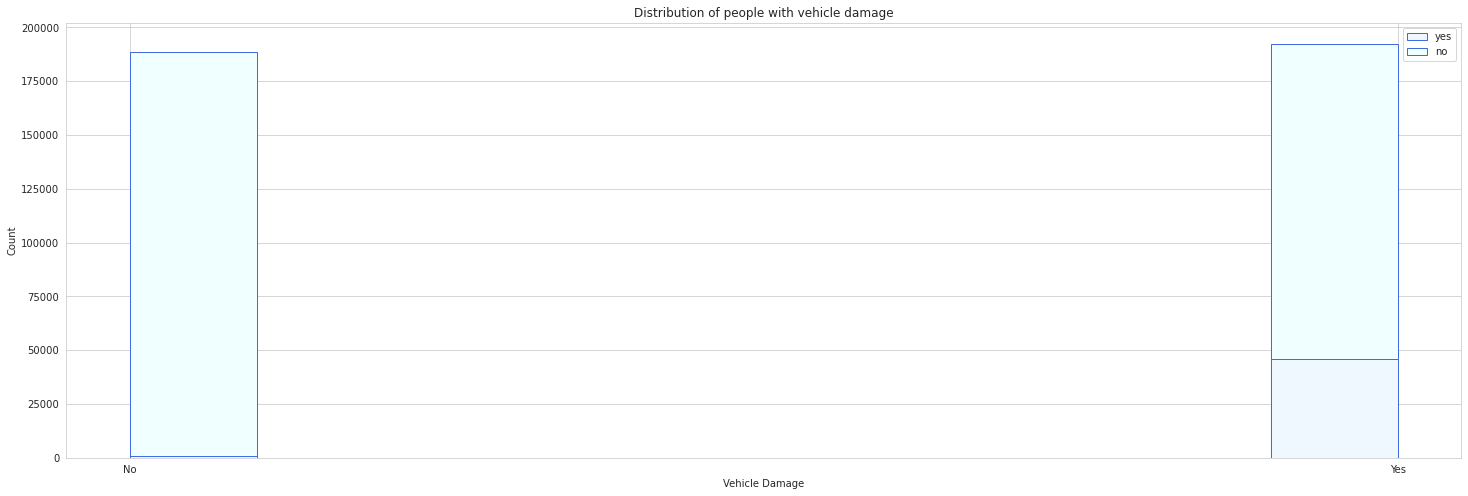

In [28]:
plt.figure(figsize = (25,8))
plt.hist(x = [train_data[train_data['Response']==1]['Vehicle_Damage'],train_data[train_data['Response']==0]['Vehicle_Damage']],color=['aliceblue','azure'],stacked=True,edgecolor='royalblue',label = ['yes','no'])
plt.xticks(ticks = [0,1],labels = ['No','Yes'])
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.title('Distribution of people with vehicle damage')
plt.legend()

* Less than 1% people who do not have vehicle damage have a response 1
* 23% people approximately from the sample with response 1 had vehicle damage

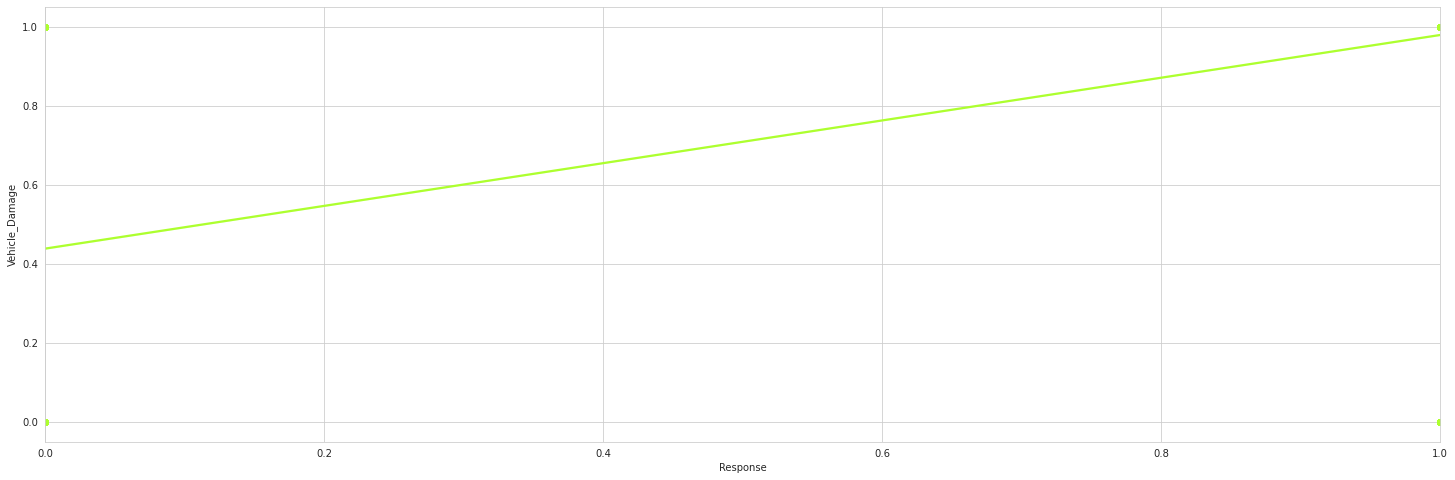

In [29]:
plt.figure(figsize = (25,8))
sb.regplot(train_data['Response'],train_data['Vehicle_Damage'],color = 'greenyellow')

**Respone tends to be 1 when vehicle damage is present**

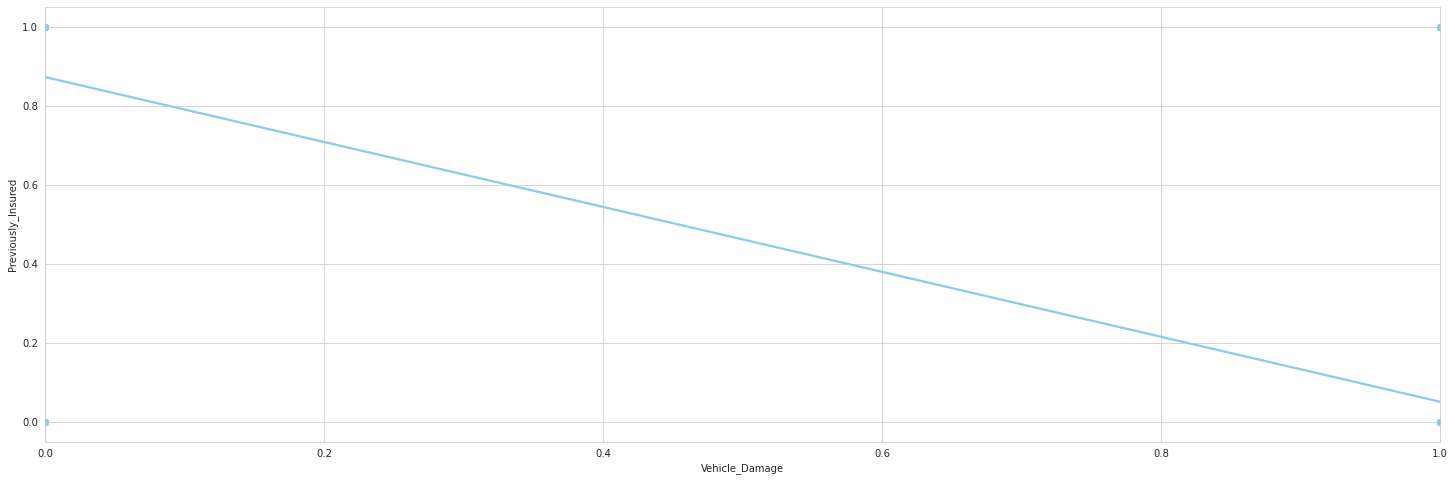

In [30]:
plt.figure(figsize = (25,8))
sb.regplot(train_data['Vehicle_Damage'],train_data['Previously_Insured'],color='skyblue')

**Does having a lesser or more premium anually have an effect on positive response for insurance?**

Text(0.5, 1.0, 'Premium Distribution')

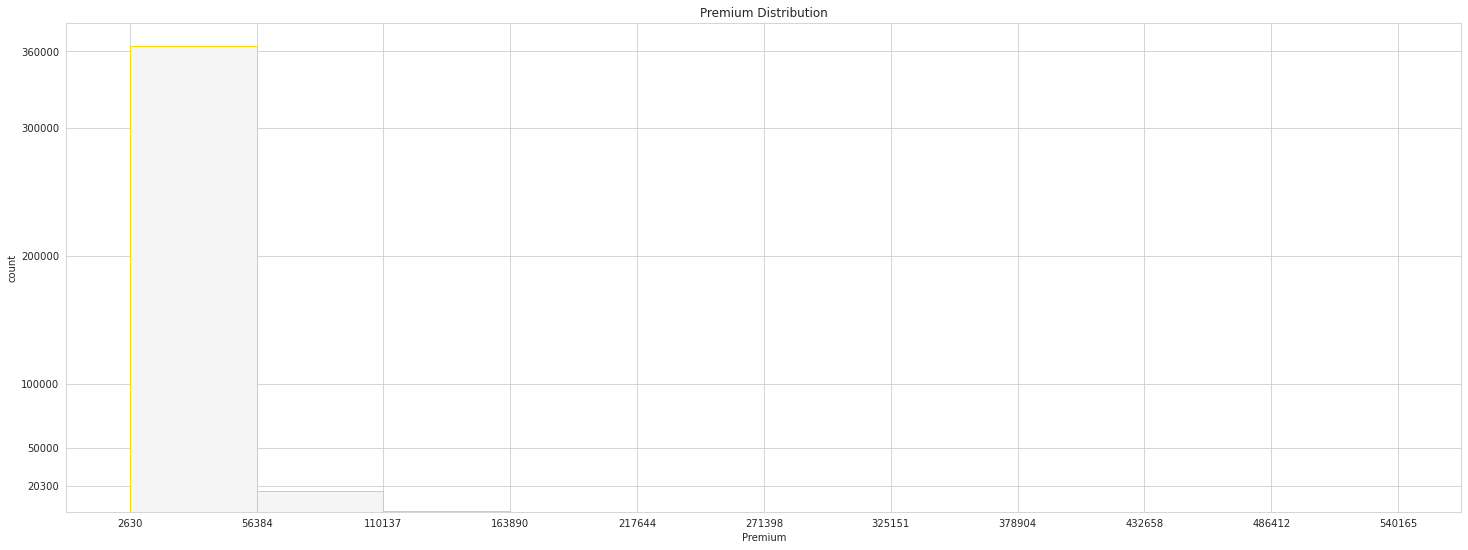

In [31]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Annual_Premium'],color='whitesmoke',edgecolor='gold')
plt.xticks([2630. , 56383.5, 110137. , 163890.5, 217644. , 271397.5,325151. , 378904.5, 432658. , 486411.5, 540165.])
plt.yticks([20300,50000,100000,200000,300000,360000])
plt.xlabel('Premium')
plt.ylabel('count')
plt.title('Premium Distribution')

* 94% Annual Premium is between 2630 and 56384
* 5.3% Annual Premium is between 56384 and 110147
* 1 % pay higher annual p

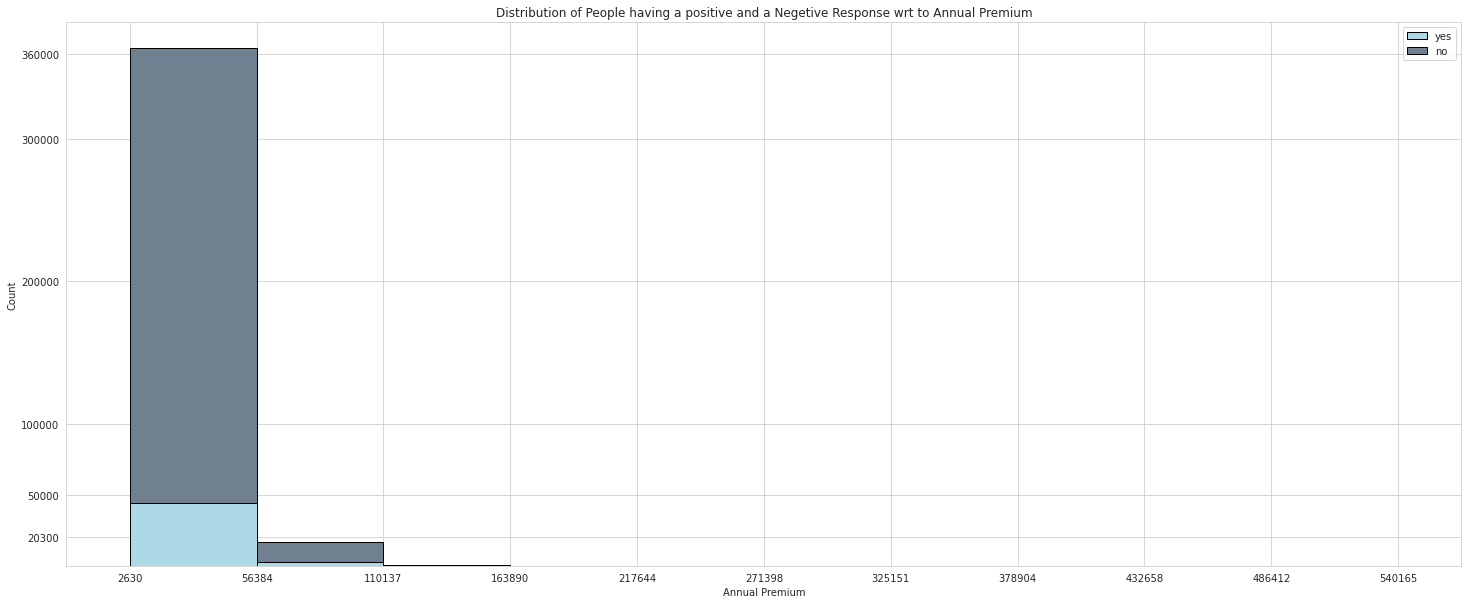

In [32]:
plt.figure(figsize = (25,10))
plt.hist(x = [train_data[train_data['Response']==1]['Annual_Premium'],train_data[train_data['Response']==0]['Annual_Premium']],color=['lightblue','slategrey'],stacked=True,edgecolor='black',label = ['yes','no'])
plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.xticks([2630. , 56383.5, 110137. , 163890.5, 217644. , 271397.5,325151. , 378904.5, 432658. , 486411.5, 540165.])
plt.yticks([20300,50000,100000,200000,300000,360000])
plt.title('Distribution of People having a positive and a Negetive Response wrt to Annual Premium')
plt.legend()

* 13% people paying annual premium between 2630 and 56384 have a response 1
* 10% people paying annual premium between 56384 and 110137 have a response 1


**How does vehicles age affect response?**

Text(0.5, 1.0, 'Vehicle Age Distribution')

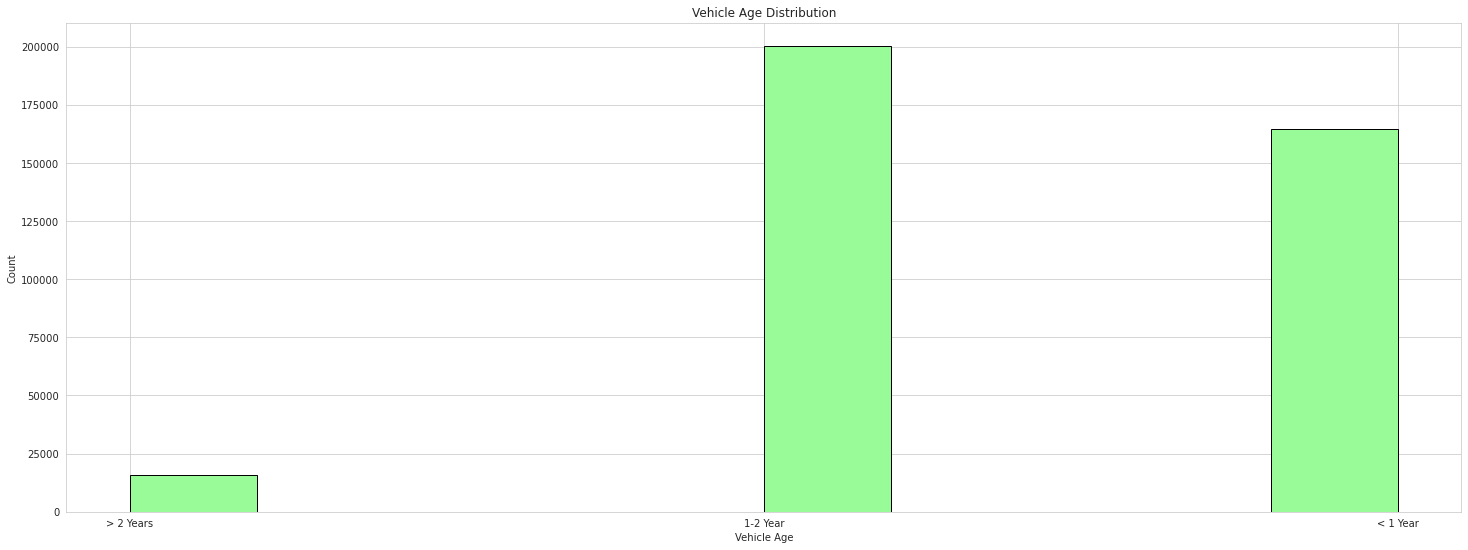

In [33]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Vehicle_Age'],color='palegreen',edgecolor='black')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Vehicle Age Distribution')

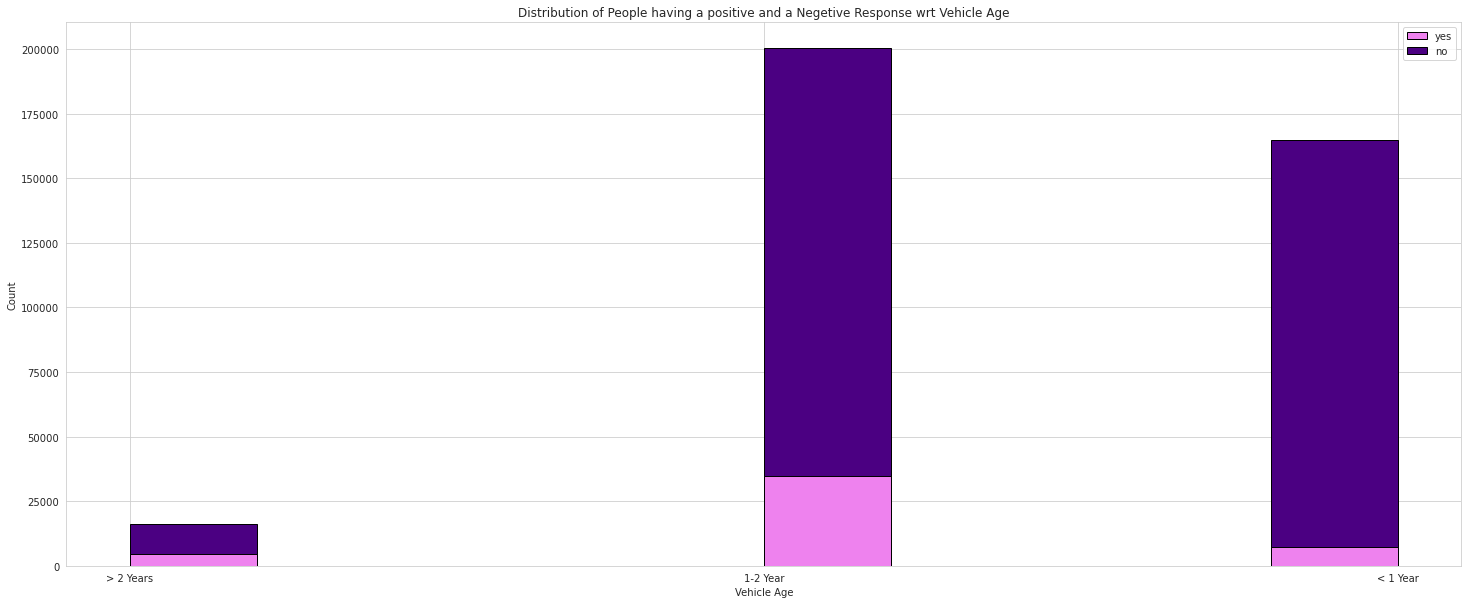

In [34]:
plt.figure(figsize = (25,10))
plt.hist(x = [train_data[train_data['Response']==1]['Vehicle_Age'],train_data[train_data['Response']==0]['Vehicle_Age']],color=['violet','indigo'],stacked=True,edgecolor='black',label = ['yes','no'])
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of People having a positive and a Negetive Response wrt Vehicle Age')
plt.legend()

**Chances of response 1 is higher when vehicle is relatively new and gets lower as age approaches 1st year but increases as vehicle age increases**

**How does Policy Sales Channel affect response?**


**Policy Sales Channel:-Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc**.

Text(0.5, 1.0, 'Policy Sales Channel Distribution')

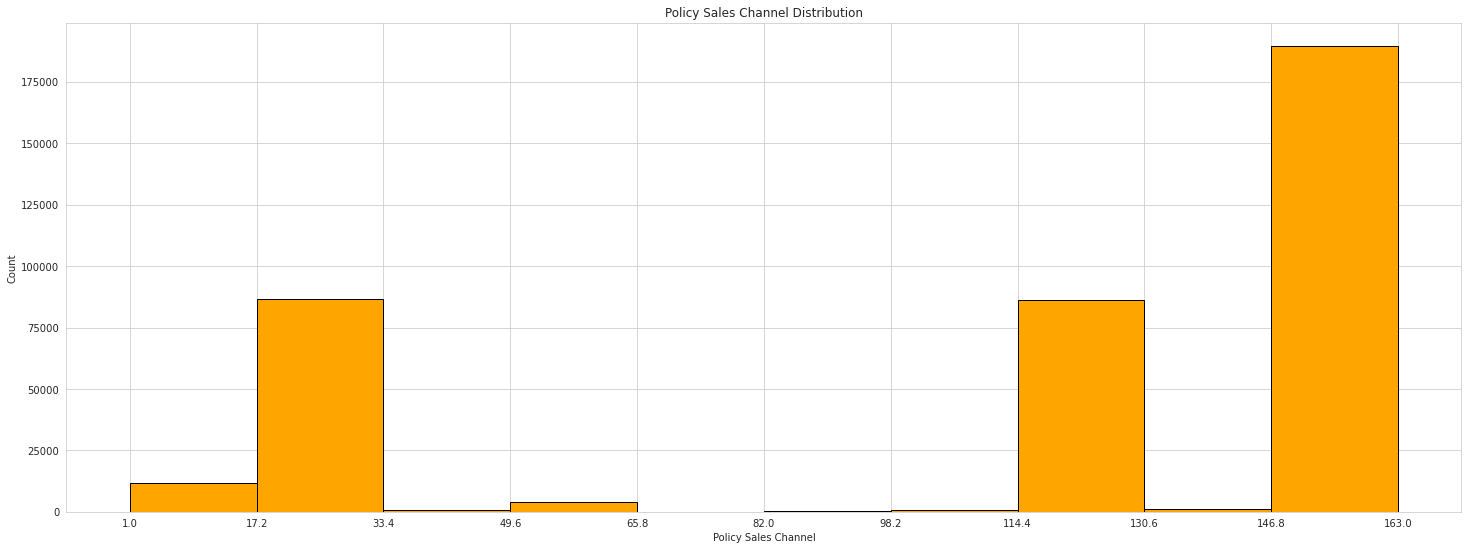

In [35]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Policy_Sales_Channel'],color='orange',edgecolor='black')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.xticks([ 1. ,  17.2,  33.4,  49.6,  65.8,  82. ,  98.2, 114.4, 130.6,
        146.8, 163. ])
plt.title('Policy Sales Channel Distribution')

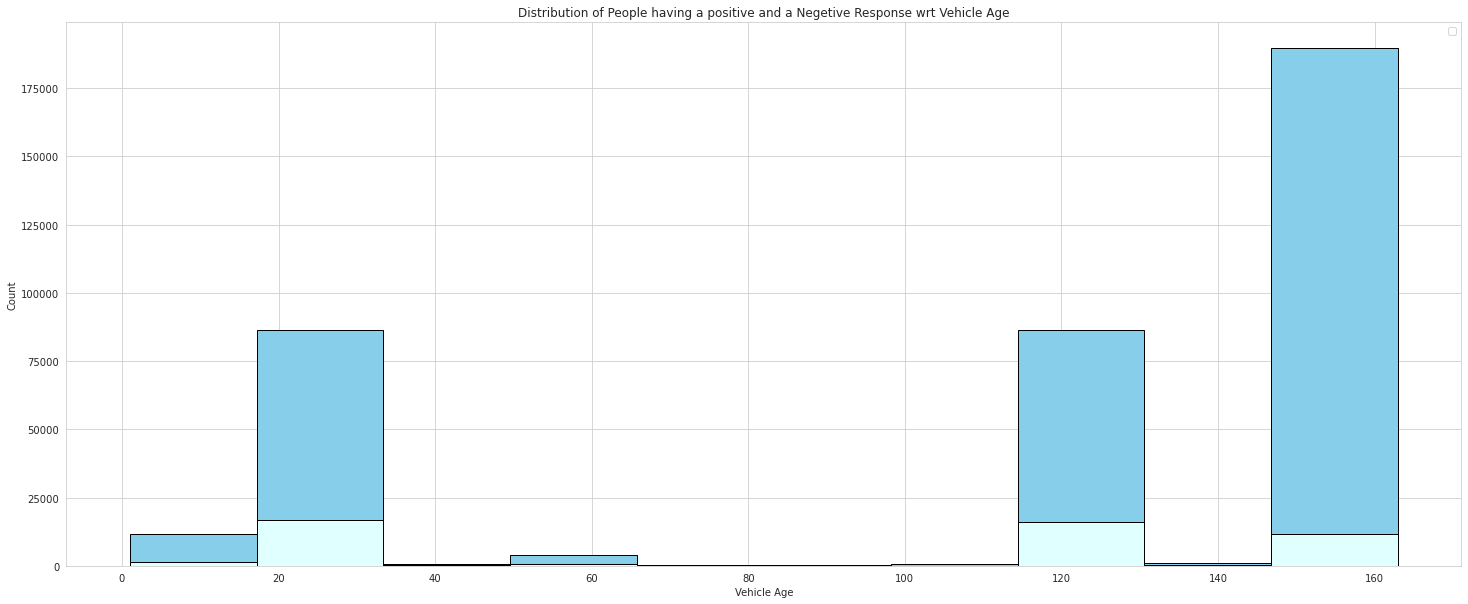

In [36]:
plt.figure(figsize = (25,10))
plt.hist(x = [train_data[train_data['Response']==1]['Policy_Sales_Channel'],train_data[train_data['Response']==0]['Policy_Sales_Channel']],color=['lightcyan','skyblue'],stacked=True,edgecolor='black')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of People having a positive and a Negetive Response wrt Vehicle Age')
plt.legend()

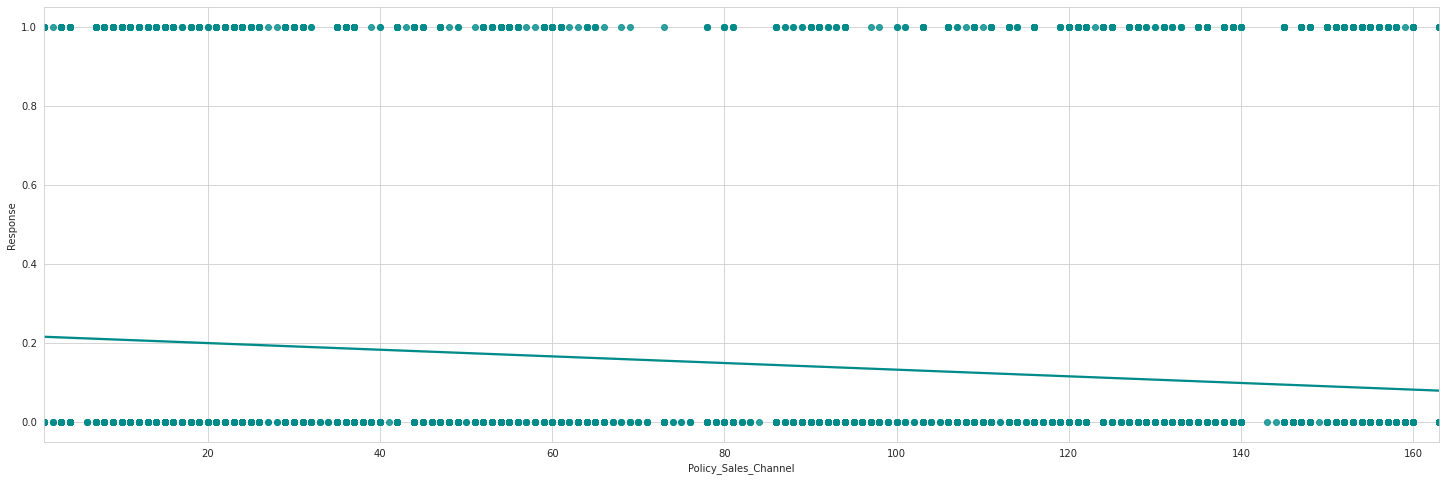

In [37]:
plt.figure(figsize = (25,8))
sb.regplot(train_data['Policy_Sales_Channel'],train_data['Response'],color = 'darkcyan')

**As Policy Sales Channel has increases response has decreased**

**how vintage affects the customers response?**

**vintage:- Number of Days, Customer has been associated with the company**

Text(0.5, 1.0, 'Vintage Distribution')

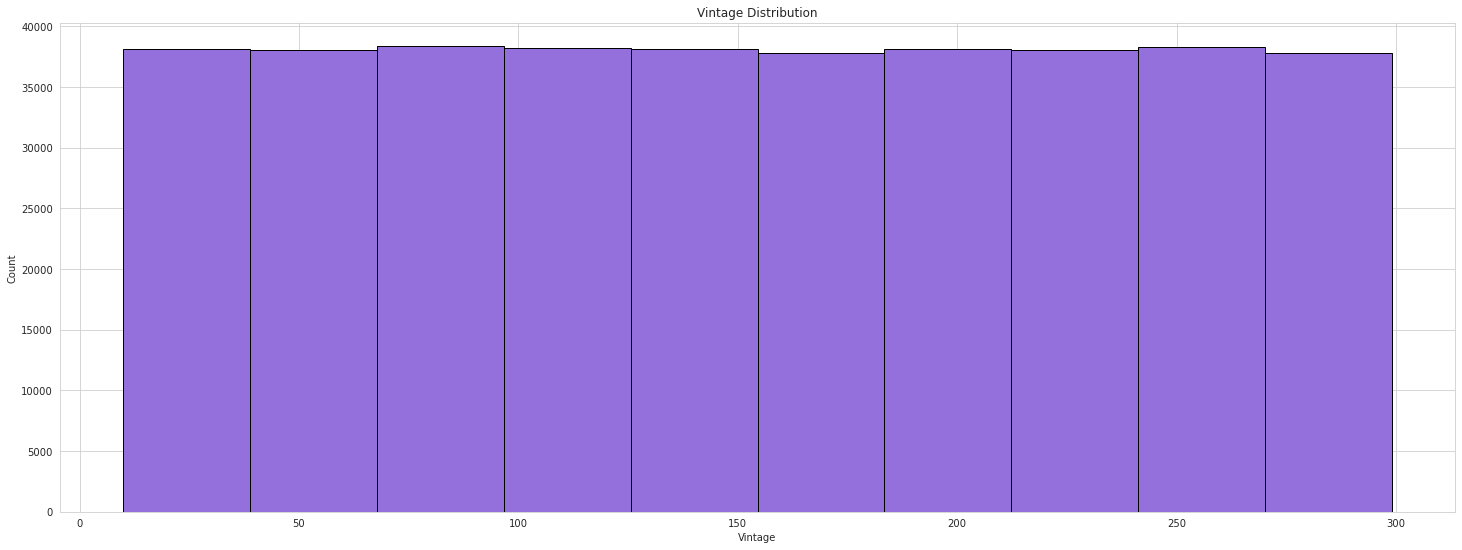

In [38]:
plt.figure(figsize = (25,9))
plt.hist(train_data['Vintage'],color='mediumpurple',edgecolor='black')
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title('Vintage Distribution')

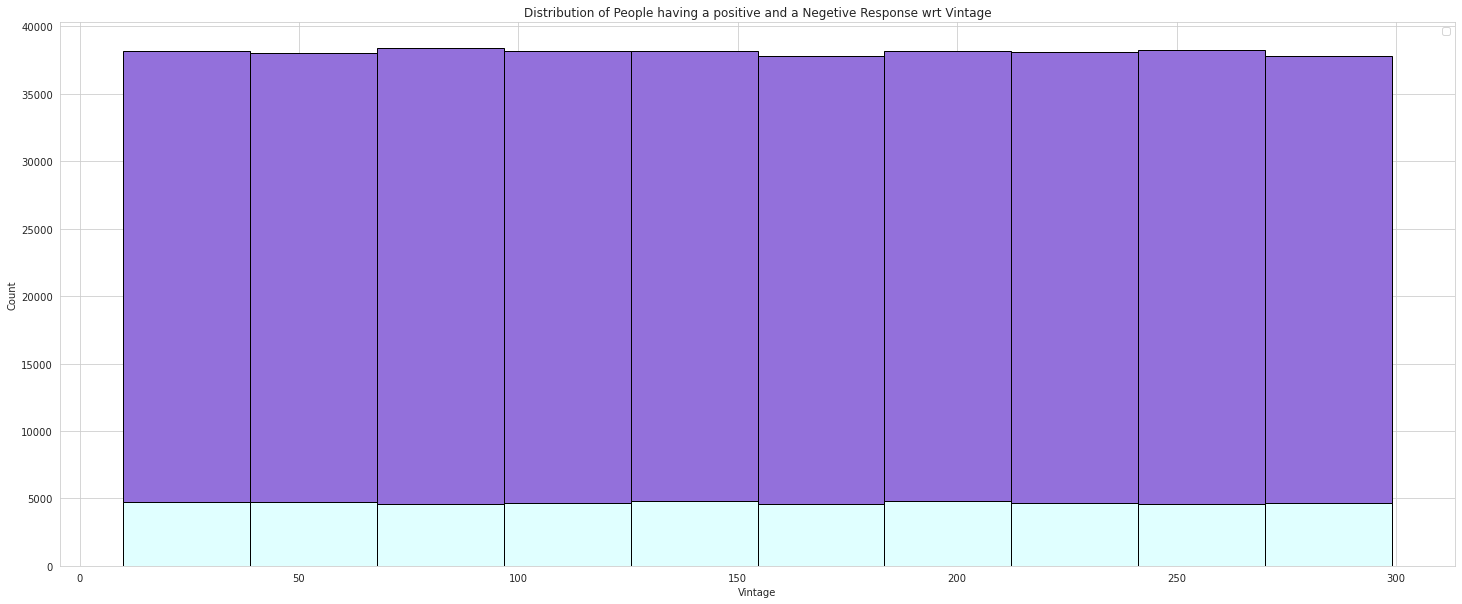

In [39]:
plt.figure(figsize = (25,10))
plt.hist(x = [train_data[train_data['Response']==1]['Vintage'],train_data[train_data['Response']==0]['Vintage']],color=['lightcyan','mediumpurple'],stacked=True,edgecolor='black')
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title('Distribution of People having a positive and a Negetive Response wrt Vintage')
plt.legend()

**The number of people with a positve response are equal across the vintage distribution**

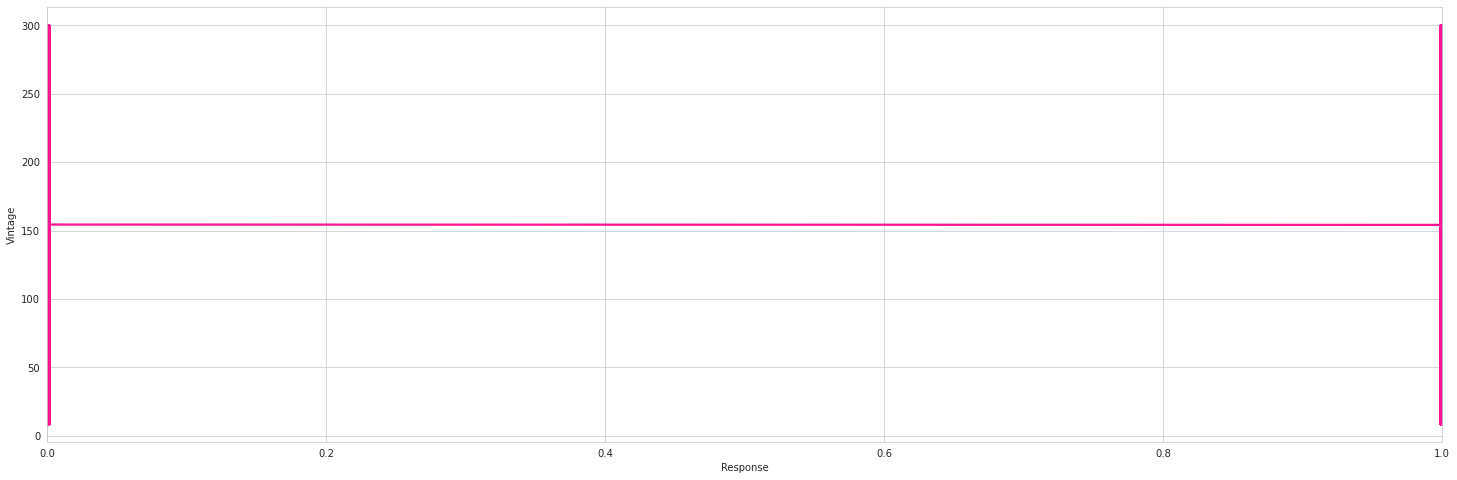

In [40]:
plt.figure(figsize = (25,8))
sb.regplot(train_data['Response'],train_data['Vintage'],color = 'deeppink')

**Vintage does not affect one's response this is clear from the regression plot**

# **Model Selection**

In [41]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [42]:
X = train_data[['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', ]]
y = train_data['Response']


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

**Logistic Regression**

In [44]:
clf1 = LogisticRegression(C=0.01,max_iter = 1000)
clf1.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [45]:
y_train_pred = cross_val_predict(clf1,X_train,y_train,cv=4)
print("Confusion Matrix: \n",confusion_matrix(y_train,y_train_pred))
print('Precision Score:',precision_score(y_train,y_train_pred))
print("Recall Score:",recall_score(y_train,y_train_pred))
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("Cross Val Score Insample",cross_val_score(clf1,X_train,y_train,cv=4,scoring='accuracy').mean())
print("Cross Val Score Outsample",cross_val_score(clf1,X_test,y_test,cv=4,scoring='accuracy').mean())

Confusion Matrix: 
 [[249841    940]
 [ 34704    346]]
Precision Score: 0.2690513219284603
Recall Score: 0.009871611982881598
Accuracy Score: 0.87529694119952
Cross Val Score Insample 0.8752969484900307
Cross Val Score Outsample 0.8764562403155987


**Clear Case of overfitting**

**Naive Bayes**

In [46]:
clf2 = GaussianNB()
clf2.fit(X_train,y_train)

GaussianNB()

In [47]:
y_train_pred = cross_val_predict(clf2,X_train,y_train,cv=4)
print("Confusion Matrix: \n",confusion_matrix(y_train,y_train_pred))
print('Precision Score:',precision_score(y_train,y_train_pred))
print("Recall Score:",recall_score(y_train,y_train_pred))
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("Cross Val Score Insample",cross_val_score(clf2,X_train,y_train,cv=4,scoring='accuracy').mean())
print("Cross Val Score Outsample",cross_val_score(clf2,X_test,y_test,cv=4,scoring='accuracy').mean())

Confusion Matrix: 
 [[230872  19909]
 [ 25603   9447]]
Precision Score: 0.3218081482490803
Recall Score: 0.26952924393723254
Accuracy Score: 0.8407730442114396
Cross Val Score Insample 0.8407730403377263
Cross Val Score Outsample 0.8378744391344335


overfitting

**DecisionTreeClassifier**

In [48]:
param_grid = {'max_depth':np.arange(1,10),'min_samples_leaf':np.arange(1,8)}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7])})

In [49]:
grid.best_params_

{'max_depth': 1, 'min_samples_leaf': 1}

In [50]:
clf3 = grid.best_estimator_

In [51]:
clf3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [52]:
y_train_pred = cross_val_predict(clf3,X_train,y_train,cv=4)
print("Confusion Matrix: \n",confusion_matrix(y_train,y_train_pred))
print('Precision Score:',precision_score(y_train,y_train_pred))
print("Recall Score:",recall_score(y_train,y_train_pred))
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("Cross Val Score Insample",cross_val_score(clf3,X_train,y_train,cv=4,scoring='accuracy').mean())
print("Cross Val Score Outsample",cross_val_score(clf3,X_test,y_test,cv=4,scoring='accuracy').mean())

Confusion Matrix: 
 [[250781      0]
 [ 35050      0]]
Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.8773750922748057


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Val Score Insample 0.8773750922947832
Cross Val Score Outsample 0.8776212766311451


**RandomForest**

In [53]:
clf5 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=2, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=-1, random_state=1, verbose=0,
                       warm_start=False)
clf5.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=2, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=10, n_jobs=-1,
                       random_state=1)

In [54]:
y_train_pred = cross_val_predict(clf5,X_train,y_train,cv=4)
print("Confusion Matrix: \n",confusion_matrix(y_train,y_train_pred))
print('Precision Score:',precision_score(y_train,y_train_pred))
print("Recall Score:",recall_score(y_train,y_train_pred))
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("Cross Val Score Insample",cross_val_score(clf5,X_train,y_train,cv=4,scoring='accuracy').mean())
print("Cross Val Score Outsample",cross_val_score(clf5,X_test,y_test,cv=4,scoring='accuracy').mean())

Confusion Matrix: 
 [[250781      0]
 [ 35050      0]]
Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.8773750922748057


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Val Score Insample 0.8773750922947832
Cross Val Score Outsample 0.8776212766311451


**Bagging Classifier**

In [55]:
clf6 = BaggingClassifier(DecisionTreeClassifier(max_depth=1,min_samples_leaf=1),bootstrap=True)
clf6.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [56]:
y_train_pred = cross_val_predict(clf6,X_train,y_train,cv=4)
print("Confusion Matrix: \n",confusion_matrix(y_train,y_train_pred))
print('Precision Score:',precision_score(y_train,y_train_pred))
print("Recall Score:",recall_score(y_train,y_train_pred))
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("Cross Val Score Insample",cross_val_score(clf6,X_train,y_train,cv=4,scoring='accuracy').mean())
print("Cross Val Score Outsample",cross_val_score(clf6,X_test,y_test,cv=4,scoring='accuracy').mean())

Confusion Matrix: 
 [[250781      0]
 [ 35050      0]]
Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.8773750922748057


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Val Score Insample 0.8773750922947832
Cross Val Score Outsample 0.8776212766311451


In [57]:
clf7 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,min_samples_leaf=1))
clf7.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [58]:
y_train_pred = cross_val_predict(clf7,X_train,y_train,cv=4)
print("Confusion Matrix: \n",confusion_matrix(y_train,y_train_pred))
print('Precision Score:',precision_score(y_train,y_train_pred))
print("Recall Score:",recall_score(y_train,y_train_pred))
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("Cross Val Score Insample",cross_val_score(clf7,X_train,y_train,cv=4,scoring='accuracy').mean())
print("Cross Val Score Outsample",cross_val_score(clf7,X_test,y_test,cv=4,scoring='accuracy').mean())

Confusion Matrix: 
 [[250767     14]
 [ 35039     11]]
Precision Score: 0.44
Recall Score: 0.0003138373751783167
Accuracy Score: 0.8773645965623043
Cross Val Score Insample 0.8773645966190016
Cross Val Score Outsample 0.8775268137865512


# **Model Deployement**

In [59]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,min_samples_leaf=1))
classifier.fit(X,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [60]:
classifier.predict(test_data)

array([0, 0, 0, ..., 0, 0, 0])